## Práctica Redes Recurrentes


### Iván López de Munain Quintana

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN 
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
import pandas as pd
import keras.backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Simple RNN

In [2]:
#Funciones proporcionadas en clase

# Calculates a successfull ratio using less relative error than a maximum criterium
def porcentaje_margen(y_true, y_pred):
    margen = 0.02
    yy = K.sum(K.cast(K.less(K.abs((y_pred/y_true)-1.0), margen), dtype=float))
    return yy/K.cast(K.shape(y_pred)[0], dtype=float)

# Division of a global sequences into n_step size ones (X) with the corresponding prediction desired y
def split_sequence(sequence,n_steps):
    X,y = list(),list()
    for i in range(len(sequence)):
        #find the end of othis pattern
        end_ix = i+n_steps
        #check if we are beyond the sequence 
        if end_ix > len(sequence)-1:  #Cuando no puede mas, se acaba
            break
        #gather input and output parts of the pattern
        seq_x,seq_y = sequence[i:end_ix],sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

In [3]:
tabla_historico=pd.read_excel('historica Iberdrola DIC 16-19.xls')
print(tabla_historico)

           Fecha  Último
0    29-nov-2019   8.928
1    28-nov-2019   8.916
2    27-nov-2019   8.928
3    26-nov-2019   8.896
4    25-nov-2019   8.898
..           ...     ...
735  07-dic-2016   5.729
736  06-dic-2016   5.775
737  05-dic-2016   5.581
738  02-dic-2016   5.599
739  01-dic-2016   5.599

[740 rows x 2 columns]


In [7]:

T=20 #Tamaño de las secuencias
n_features=1 # numero de caracteristicas

#conjunto X (20 observaciones por serie)
# y (ultimo valor de cada serie)
X,y=split_sequence(tabla_historico['Último'],T)

#Para normalizar entre [0,15]
X=X/15
y=y/15

X=X.reshape(X.shape[0], X.shape[1],1)


#Train y test
#desordeno aleatoriamente los indices y cojo 2/3 para entrenamiento y 1/3 para test
indices=np.arange(y.shape[0],dtype=int)
np.random.shuffle(indices)
train=indices[0:int(y.shape[0]*2/3)]
test=indices[int(y.shape[0]*2/3):]

#Entrenamiento y validación
SRNN = Sequential()
SRNN.add(SimpleRNN(input_shape=(T,n_features),units=30,activation='relu',return_sequences=True))
SRNN.add(SimpleRNN(5,activation="relu"))
#Capa de salida de un perceptrón multicapa
SRNN.add(Dense(1)) 

SRNN.compile(optimizer="adam",loss="mse",metrics=[porcentaje_margen])

history=SRNN.fit(X[train], y[train], epochs=100, verbose=1, validation_data=(X[test],y[test]))


Train on 480 samples, validate on 240 samples
Epoch 1/100
480/480 [==============================] - 2s 4ms/step - loss: 0.0366 - porcentaje_margen: 0.0042 - val_loss: 1.8672e-04 - val_porcentaje_margen: 0.5625
Epoch 2/100
480/480 [==============================] - 0s 915us/step - loss: 0.0025 - porcentaje_margen: 0.0938 - val_loss: 1.9065e-04 - val_porcentaje_margen: 0.6625
Epoch 3/100
480/480 [==============================] - 0s 867us/step - loss: 6.4232e-04 - porcentaje_margen: 0.2521 - val_loss: 1.5193e-04 - val_porcentaje_margen: 0.5333
Epoch 4/100
480/480 [==============================] - 0s 920us/step - loss: 2.4312e-04 - porcentaje_margen: 0.3500 - val_loss: 1.6986e-04 - val_porcentaje_margen: 0.6250
Epoch 5/100
480/480 [==============================] - 0s 925us/step - loss: 1.5337e-04 - porcentaje_margen: 0.6250 - val_loss: 1.4804e-04 - val_porcentaje_margen: 0.5375
Epoch 6/100
480/480 [==============================] - 0s 921us/step - loss: 1.3180e-04 - porcentaje_margen: 

Epoch 49/100
480/480 [==============================] - 0s 868us/step - loss: 3.7099e-05 - porcentaje_margen: 0.8812 - val_loss: 3.6254e-05 - val_porcentaje_margen: 0.9000
Epoch 50/100
480/480 [==============================] - 0s 885us/step - loss: 3.6691e-05 - porcentaje_margen: 0.8792 - val_loss: 3.5785e-05 - val_porcentaje_margen: 0.8917
Epoch 51/100
480/480 [==============================] - 0s 1ms/step - loss: 3.6874e-05 - porcentaje_margen: 0.8938 - val_loss: 3.5665e-05 - val_porcentaje_margen: 0.8917
Epoch 52/100
480/480 [==============================] - 1s 1ms/step - loss: 3.6249e-05 - porcentaje_margen: 0.8917 - val_loss: 3.5652e-05 - val_porcentaje_margen: 0.9000
Epoch 53/100
480/480 [==============================] - 1s 1ms/step - loss: 3.6315e-05 - porcentaje_margen: 0.8854 - val_loss: 3.5558e-05 - val_porcentaje_margen: 0.8958
Epoch 54/100
480/480 [==============================] - 1s 1ms/step - loss: 3.5670e-05 - porcentaje_margen: 0.8833 - val_loss: 3.6815e-05 - val_po

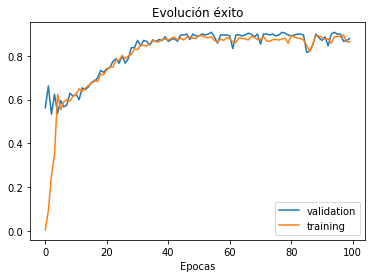

In [10]:
plt.plot(history.epoch,history.history['val_porcentaje_margen'],label='validation')
plt.plot(history.epoch,history.history['porcentaje_margen'],label="training")
plt.legend()
plt.title('Evolución éxito')
plt.xlabel('Epocas')
plt.show()

## LSTM

In [11]:
#Entrenamiento y validación
LSTM_model = Sequential()
LSTM_model.add(LSTM(5, return_sequences=False,input_shape=(T, n_features)))
#Capa de salida de un perceptrón multicapa
LSTM_model.add(Dense(1)) 

LSTM_model.compile(optimizer="adam",loss="mse",metrics=[porcentaje_margen])

historyLSTM=LSTM_model.fit(X[train], y[train], epochs=100, verbose=1, validation_data=(X[test],y[test]))


Train on 480 samples, validate on 240 samples
Epoch 1/100
480/480 [==============================] - 3s 7ms/step - loss: 0.3775 - porcentaje_margen: 0.0000e+00 - val_loss: 0.3216 - val_porcentaje_margen: 0.0000e+00
Epoch 2/100
480/480 [==============================] - 0s 951us/step - loss: 0.2667 - porcentaje_margen: 0.0000e+00 - val_loss: 0.2200 - val_porcentaje_margen: 0.0000e+00
Epoch 3/100
480/480 [==============================] - 0s 1ms/step - loss: 0.1762 - porcentaje_margen: 0.0000e+00 - val_loss: 0.1396 - val_porcentaje_margen: 0.0000e+00
Epoch 4/100
480/480 [==============================] - 0s 960us/step - loss: 0.1067 - porcentaje_margen: 0.0000e+00 - val_loss: 0.0790 - val_porcentaje_margen: 0.0000e+00
Epoch 5/100
480/480 [==============================] - 0s 969us/step - loss: 0.0562 - porcentaje_margen: 0.0000e+00 - val_loss: 0.0376 - val_porcentaje_margen: 0.0000e+00
Epoch 6/100
480/480 [==============================] - 0s 971us/step - loss: 0.0240 - porcentaje_margen

480/480 [==============================] - 0s 947us/step - loss: 1.0780e-04 - porcentaje_margen: 0.6354 - val_loss: 1.0724e-04 - val_porcentaje_margen: 0.6083
Epoch 99/100
480/480 [==============================] - 0s 1ms/step - loss: 1.0716e-04 - porcentaje_margen: 0.6375 - val_loss: 1.0432e-04 - val_porcentaje_margen: 0.5958
Epoch 100/100
480/480 [==============================] - 0s 955us/step - loss: 1.0633e-04 - porcentaje_margen: 0.6375 - val_loss: 1.0353e-04 - val_porcentaje_margen: 0.6042


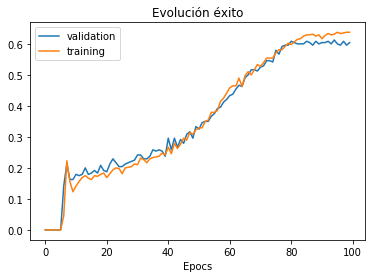

In [12]:
plt.plot(historyLSTM.epoch,historyLSTM.history['val_porcentaje_margen'],label='validation')
plt.plot(historyLSTM.epoch,historyLSTM.history['porcentaje_margen'],label="training")
plt.legend()
plt.title('Evolución éxito')
plt.xlabel('Epocs')
plt.show()

## GRU

In [17]:
#Entrenamiento y validación
GRU_model = Sequential()
GRU_model.add(GRU(5, return_sequences=False, input_shape=(T, n_features)))
#Capa de salida de un perceptrón multicapa
GRU_model.add(Dense(1)) 

GRU_model.compile(optimizer="adam",loss="mse",metrics=[porcentaje_margen])

historyGRU=GRU_model.fit(X[train], y[train], epochs=100, verbose=1, validation_data=(X[test],y[test]))

Train on 480 samples, validate on 240 samples
Epoch 1/100
480/480 [==============================] - 3s 7ms/step - loss: 0.0012 - porcentaje_margen: 0.2208 - val_loss: 3.1781e-04 - val_porcentaje_margen: 0.2292
Epoch 2/100
480/480 [==============================] - 0s 819us/step - loss: 3.0051e-04 - porcentaje_margen: 0.2979 - val_loss: 9.8013e-05 - val_porcentaje_margen: 0.6958
Epoch 3/100
480/480 [==============================] - 0s 852us/step - loss: 1.2088e-04 - porcentaje_margen: 0.6854 - val_loss: 1.0277e-04 - val_porcentaje_margen: 0.7292
Epoch 4/100
480/480 [==============================] - 0s 841us/step - loss: 8.8512e-05 - porcentaje_margen: 0.6687 - val_loss: 9.1527e-05 - val_porcentaje_margen: 0.6875
Epoch 5/100
480/480 [==============================] - 0s 906us/step - loss: 8.1958e-05 - porcentaje_margen: 0.7021 - val_loss: 8.9224e-05 - val_porcentaje_margen: 0.7167
Epoch 6/100
480/480 [==============================] - 0s 892us/step - loss: 7.8047e-05 - porcentaje_marg

Epoch 96/100
480/480 [==============================] - 1s 1ms/step - loss: 2.5315e-05 - porcentaje_margen: 0.9250 - val_loss: 2.6898e-05 - val_porcentaje_margen: 0.9375
Epoch 97/100
480/480 [==============================] - 0s 935us/step - loss: 2.5682e-05 - porcentaje_margen: 0.9208 - val_loss: 2.7508e-05 - val_porcentaje_margen: 0.9208
Epoch 98/100
480/480 [==============================] - 0s 904us/step - loss: 2.7386e-05 - porcentaje_margen: 0.9146 - val_loss: 2.8498e-05 - val_porcentaje_margen: 0.9333
Epoch 99/100
480/480 [==============================] - 0s 961us/step - loss: 2.5785e-05 - porcentaje_margen: 0.9208 - val_loss: 2.6163e-05 - val_porcentaje_margen: 0.9375
Epoch 100/100
480/480 [==============================] - 0s 912us/step - loss: 2.4911e-05 - porcentaje_margen: 0.9167 - val_loss: 2.6187e-05 - val_porcentaje_margen: 0.9333


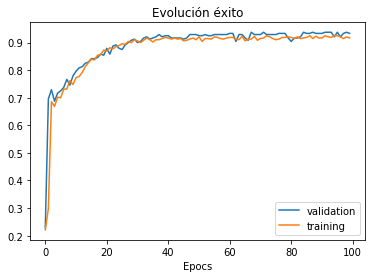

In [18]:
plt.plot(historyGRU.epoch,historyGRU.history['val_porcentaje_margen'],label='validation')
plt.plot(historyGRU.epoch,historyGRU.history['porcentaje_margen'],label="training")
plt.legend()
plt.title('Evolución éxito')
plt.xlabel('Epocs')
plt.show()

Se puede observar cómo se ha obtenido mejores resultados con SimpleRNN que con LSTM, esto es debido a que LSTM es mejor cuando los intervalos de tiempos son muy largos y abarcan un gran periodo en el tiempo. Es por esto que con el que mejores resultados se obtiene es con el GRU que es un algoritmo intermedio entre SimpleRNN y LSTM.